# Research of apartment sale ads

### Stage 1. Data research

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
# read the data 
data = pd.read_csv('./real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [25]:
# print the general information to check NaN values and columns type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

###### According to recieved information we see, there are NaN values in some columns. <br> Check values in each column and determine where and how NaN values should be filled.

In [26]:
# check values in column 'total_images'
data['total_images'].value_counts().sort_index()

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

######  Everything is ok

In [27]:
#check range of values in 'last_price' column
print(data['last_price'].min())
print(data['last_price'].max())

12190.0
763000000.0


###### <font color='red'>The range of values is too wide. <br> It is necessary to examine the price in more detail   for presence outlier</font>

In [28]:
#check range of values in 'total_area' column
print(data['total_area'].min())
print(data['total_area'].max())

12.0
900.0


###### <font color='red'>The range of values is too wide. <br> It is necessary to examine the price in more detail  for presence outlier</font>

In [29]:
# check values in 'rooms' column
data['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

###### <font color='red'>It's necessary to check ads with zero number of room. Is it studio or not.</font>

In [30]:
# Count number of NaN values in column 'ceiling_height',and max and min values
print('count of NaN:',data['ceiling_height'].isna().sum())
#print('min height:',(data.query('ceiling_height.isna() == False'))['ceiling_height'].min())
#print('max height:',(data.query('ceiling_height.isna() == False'))['ceiling_height'].max())

print('min height:', ( data[data['ceiling_height'].isna() == False] ['ceiling_height'].min() ))
print('min height:', ( data[data['ceiling_height'].isna() == False] ['ceiling_height'].max() ))

count of NaN: 9195
min height: 1.0
min height: 100.0


###### <font color='red'>NaN values should be filled. <br> The max and min values looks like outliers. </font>

In [31]:
# Count number of NaN values in column 'floors_total' and 'living area'
print('floors_total info')
print('count of NaN:', data['floors_total'].isnull().sum())
print('min:',data['floor'].min())
print('max:', data['floor'].max())

print()
print('living_area info')
print('count of NaN:', data['living_area'].isnull().sum())
print('min:',data['living_area'].min())
print('max:',data['living_area'].max())

floors_total info
count of NaN: 86
min: 1
max: 33

living_area info
count of NaN: 1903
min: 2.0
max: 409.7


###### <font color='red'>NaN values should be filled. <br> 'living_area info' should be cleaned from outlier data </font>

In [32]:
# Count number of NaN values in column
print(data['is_apartment'].value_counts())
print('count of NaN:',data['is_apartment'].isnull().sum())

False    2725
True       50
Name: is_apartment, dtype: int64
count of NaN: 20924


###### <font color='red'>NaN values should be filled. <br> A column type should be chenged to 'bool'. </font>

In [33]:
# check unique values in column 'studio_values'
print('studio_values')
print(data['studio'].value_counts())
print('')
# check unique values in column 'open_plan_values'
print('open_plan_values')
print(data['open_plan'].value_counts())

studio_values
False    23550
True       149
Name: studio, dtype: int64

open_plan_values
False    23632
True        67
Name: open_plan, dtype: int64


###### Everything is ok

In [34]:
# count of NaN values in column 'kitchen_area' and check the range
print('min value:', data['kitchen_area'].min())
print('max value:', data['kitchen_area'].max())
print('count of NaN:',data['kitchen_area'].isnull().sum())

min value: 1.3
max value: 112.0
count of NaN: 2278


###### <font color='red'>NaN values should be filled. . </font>

In [35]:
# count of NaN values in column 'balcony'
print(data['balcony'].value_counts().sort_index())
print('count of NaN:',data['balcony'].isnull().sum())

0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64
count of NaN: 11519


###### <font color='red'>NaN values should be filled. </font>

In [36]:
# count of NaN values in column 'locality_name'
print('count of NaN:', data['locality_name'].isnull().sum())

count of NaN: 49


###### <font color='red'>NaN values should be filled or removed from data set </font>

In [37]:
# check values in column - 'airports_nearest'
print('min', data['airports_nearest'].min())
print('max', data['airports_nearest'].max())
print('count of NaN value',data['airports_nearest'].isnull().sum())

min 0.0
max 84869.0
count of NaN value 5542


###### <font color='red'>NaN values should be filled. <br> zero value is outlier and should be replaced to true value or to be ignored in analysis </font>

In [38]:
# check the column 'cityCenters_nearest'
print('min:', data['cityCenters_nearest'].min())
print('max:', data['cityCenters_nearest'].max())
print('count of NaN values:',data['airports_nearest'].isnull().sum())

min: 181.0
max: 65968.0
count of NaN values: 5542


###### <font color='red'>NaN values should be filled </font>

In [39]:
# check the column 'parks_around3000' and 'ponds_around3000'
print('parks_around3000 information')
print(data['parks_around3000'].value_counts().sort_index())
print('count of NaN values:',data['parks_around3000'].isnull().sum())

print('')
print('ponds_around3000 information')
print(data['ponds_around3000'].value_counts().sort_index())
print('count of NaN values:',data['ponds_around3000'].isnull().sum())


parks_around3000 information
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
count of NaN values: 5518

ponds_around3000 information
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
count of NaN values: 5518


###### <font color='red'>NaN values should be filled </font>

In [40]:
# check the column 'nearest_park' and 'nearest_pond'
print('nearest_park distance')
print('min:', data['parks_nearest'].min())
print('max:', data['parks_nearest'].max())
print('count of NaN values:',data['parks_nearest'].isnull().sum())

print('')
print('nearest_pond distance')
print('min:', data['ponds_nearest'].min())
print('max:', data['ponds_nearest'].max())
print('count of NaN values:',data['ponds_nearest'].isnull().sum())

nearest_park distance
min: 1.0
max: 3190.0
count of NaN values: 15620

nearest_pond distance
min: 13.0
max: 1344.0
count of NaN values: 14589


###### <font color='red'>NaN values should be filled </font>

In [41]:
# check values in column 'days_exposition'
print('min', data['days_exposition'].min())
print('max', data['days_exposition'].max())
print('count of NaN values:',data['days_exposition'].isnull().sum())

min 1.0
max 1580.0
count of NaN values: 3181


###### <font color='red'>NaN values should be filled </font>

##  Сonclusions

##### The data set contain information about 23699 flats. <br> It's required to modify information in some columns: to fill 'NaN' values, to clean outlier data, to change column type.

##### total_images ----- ok <br> last_price --------- to clean outlier data , change type to int (stage 3) <br>total_area --------- to check outlier data (max value) (stage 3)<br>first_day_exposition --------- ok<br>rooms --------- ok<br>ceiling_height  ---------  to clean outlier data, to fill in NaN values<br>floors_total  ---------  to change type value to int<br>living_area  --------- to clean outlier data<br>floor  ---------  ok<br>is_apartment  ---------  to fill in NaN values, to change column type to bool<br>studio   ---------   ok<br>open_plan  ---------   ok<br>kitchen_area  ---------   to clean outlier data, to fill in NaN values<br>balcony  ---------  to fill in NaN values, to check 3-5 balkonies<br>locality_name  ---------  to fill in NaN values<br>airports_nearest  ---------  to fill in NaN values, to change column type to int<br>cityCenters_nearest  ---------  to fill in NaN values, to change column type to int<br>parks_around3000  ---------  to fill in NaN values, to change column type to int<br>parks_nearest  ---------   to fill in NaN values, to change column type to int<br>ponds_around3000  ---------  to fill in NaN values, to change column type to int<br>ponds_nearest  ---------   to fill in NaN values, to change column type to int<br>days_exposition  ---------   to fill in NaN values 

### Stage 2. Preliminary data preparation

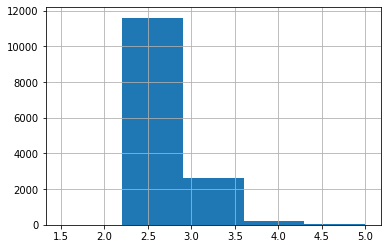

In [42]:
#clean outlier data and to fill in NaN values in column 'ceiling_height'
# draw the histogram to determine which values are outliers
data['ceiling_height'].hist(bins=5,range=(1.5,5));

In [43]:
#check the max, min and median values of 'ceiling_height'
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


##### We can see on the histogram that the ceiling height, which is less than 2.2 m and above 4.4 m. are outliers. <br>It is not recommended to delete rows with these values, because the the most valuable information, like the price, will be loss in this way. The better way to replece outliers values to median ones.

In [44]:
# replace outlier values to median ones
data.loc[(data['ceiling_height'] < 2.2) | (data['ceiling_height'] > 4.4), 
         'ceiling_height'] = data['ceiling_height'].median()

In [45]:
# count NaN values in 'ceiling_height' columns
print('Nan_values_ceiling_height_before:',data['ceiling_height'].isnull().sum())
# find 'ceiling_height' median value
ceiling_height_median = data['ceiling_height'].median()
# replace NaN value to median
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
# check NaN values after replacement 
print('Nan_values_ceiling_height_after:',data['ceiling_height'].isnull().sum())

Nan_values_ceiling_height_before: 9195
Nan_values_ceiling_height_after: 0


In [46]:
# replace NaN values in column 'floors_total' to median value. 
# If number of floor greater then menian, replace NaN value to total_floors value

floor_median = data['floors_total'].median()

def FloorTotalValue(value):
    if value > floor_median:
        return floor_median
    else:
        return value

cleaned = data[data['floors_total'].isnull()]
nan_replacement = cleaned['floor'].apply(FloorTotalValue)
data.loc[data['floors_total'].isnull(), 'floors_total'] = nan_replacement
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [54]:
# fill NaN value in 'living_area'
# count the number of NaN value
print('NaN_value_living_area_before:',data['living_area'].isnull().sum())

# Replace NaN values to median ones according to number of rooms
for rooms in data['rooms'].unique():
    filter_flags = data['living_area'].isnull() & (data['rooms'] == rooms)
    data.loc[filter_flags, 'living_area'] = data.loc[data['rooms'] == rooms, 'living_area'].median()
      
# count the number of NaN value after replacement 
print('NaN_value_living_area_after:', data['living_area'].isnull().sum())

NaN_value_living_area_before: 0
NaN_value_living_area_after: 0


In [55]:
# fill NaN values in column 'is_apartment'
#  count NaN values in 'is_apartment' columns
print('Nan_values_is_apartment',data['is_apartment'].isnull().sum())
# replace NaN value to 0
data['is_apartment'] = data['is_apartment'].fillna(0)
# check NaN values after replacement 
print('Nan_values_is_apartment_after',data['is_apartment'].isnull().sum())
# check all unique values
data['is_apartment'].value_counts()

Nan_values_is_apartment 0
Nan_values_is_apartment_after 0


0       23649
True       50
Name: is_apartment, dtype: int64

In [56]:
#  count NaN values in 'kitchen_area' columns
print('Nan_values_kitchen_area_before', data['kitchen_area'].isnull().sum())
              
#Replace NaN value in 'kitchen area' to '0', if the flat is the studio
data.loc[data['studio'] & data['kitchen_area'].isna(), 'kitchen_area'] = 0.0

# Raplace all the rest values to median area in the flat with the same number of rooms
for rooms in data['rooms'].unique():
    filter_flags = data['kitchen_area'].isnull() & (data['rooms'] == rooms)
    data.loc[filter_flags, 'kitchen_area'] = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()

# check the result after replacement
print('Nan_values_kitchen_area_after', data['kitchen_area'].isnull().sum())

Nan_values_kitchen_area_before 0
Nan_values_kitchen_area_after 0


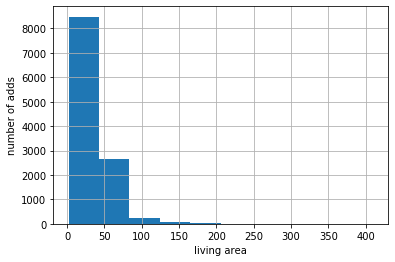

In [57]:
#to fill the NaN value in column 'balcony'
# sorted data by apartments without balcony
#data_without_balcony = data.query('balcony.isnull() == True')
data_without_balcony = data[data['balcony'].isnull() == True]
# draw the histogram to check living area of sorted data
data_without_balcony['living_area'].hist(bins = 10)
plt.xlabel('living area')
plt.ylabel('number of adds');

##### We can see on the histogram, than most appartments with NaN values in column 'balcony' have living  area 20-40 m2. It's mean, we can assume these flats have no balconies, and we can change 'NaN' values to '0'

In [58]:
#replace 'NaN' values in column 'balcony' to '0'
print('NaN_values_balcony_before',data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].fillna(0)
# check if the date has been cleaned
print('NaN_values_balcony_after', data['balcony'].isnull().sum())

NaN_values_balcony_before 11519
NaN_values_balcony_after 0


In [59]:
# fill NaN values in 'locality_name' column or remove these rows
#count NaN values in 'locality_name' column
print('NaN_value_locality_name:', data['locality_name'].isnull().sum())
# calculate the percentage of total
print('percentage of total:', data['locality_name'].isnull().sum()/len(data)*100)


NaN_value_locality_name: 49
percentage of total: 0.20675977889362418


##### The percentage of NaN values in column locality name' is 0,2 % <b> We can't clear determine the right location, that's why we can remove rows with these values. 

In [62]:
# remove the row with NaN value in 'locality_name' column
data = data[data['locality_name'].isnull() == False]
data.reset_index().head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [63]:
#count NaN values in 'airport_nearest' columns
print('NaN_ count_airport_nearest_before:',data['airports_nearest'].isnull().sum())

# replace NaN value to median value for the same location   
for locality_name in data['locality_name'].unique():
    filter_flags = data['airports_nearest'].isnull() & (data['locality_name'] == locality_name)
    data.loc[filter_flags, 'airports_nearest'] = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()
        
#count NaN values in 'airport_nearest' columns after replacement 
print('NaN_ count_airport_nearest_after:',data['airports_nearest'].isnull().sum())

NaN_ count_airport_nearest_before: 5534
NaN_ count_airport_nearest_after: 5386


In [64]:
# calculate the number of NaN values was filled
print('airports_nearest_was_filled:', 5534 - 5386)

airports_nearest_was_filled: 148


##### We are able to fill only 148 values from 5534 ones without analisys of external data. <b> These values are minor for our analysys and we can remain the value as 'NaN'.

In [65]:
#count NaN values in 'cityCenters_nearest' columns
print('NaN_ count_cityCenters_nearest_before:',data['cityCenters_nearest'].isnull().sum())

# replace NaN value to median value for the same location
for locality_name in data['locality_name'].unique():
    filter_flags = data['cityCenters_nearest'].isnull() & (data['locality_name'] == locality_name)
    data.loc[filter_flags, 'cityCenters_nearest'] = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()

#count NaN values in 'cityCenters_nearest' columns after replacement
print('NaN_ count_cityCenters_nearest_after:',data['cityCenters_nearest'].isnull().sum())

NaN_ count_cityCenters_nearest_before: 5511
NaN_ count_cityCenters_nearest_after: 5386


In [66]:
# calculate the number of NaN values was filled
print('airports_nearest_was_filled:', 5511 - 5386)

airports_nearest_was_filled: 125


##### We are able to fill only 125 values from 5511 NaN values without analisys external data. <br>Remain the value as 'NaN


In [67]:
# count NaN values in 'parks_around3000' columns
print('NaN_ count_parks_around3000_before:',data['parks_around3000'].isnull().sum())
# replace NaN values to '0' (assume there aren't any parks near)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

#count NaN values in 'parks_around3000' columns after replacement
print('NaN_ count_parks_around3000_after:',data['parks_around3000'].isnull().sum())

NaN_ count_parks_around3000_before: 5510
NaN_ count_parks_around3000_after: 0


In [68]:
#check information in column 'park_nearest'
# sort data by parameter without park
data_park_nearest = data.query('parks_around3000 == 0')
# count NaN unique values and NaN by column 'parks_nearest'
print(data_park_nearest['parks_nearest'].value_counts())
print(data_park_nearest['parks_nearest'].isnull().sum())

3190.0    2
3064.0    1
3013.0    1
Name: parks_nearest, dtype: int64
15586


##### There are 4 values 'park nearest'  > 3000. They should be replace to zero (because there is no any parks located to around). <br> And also there are 15586 'NaN' values that should be replaced by zero (there is no way to find actual information about distance to nearest park) 

In [69]:
#Replace NaN and outlier values in 'parks_nearest' to '0'
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = 0.0
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 0.0

# check is the all values was replaced
print(data['parks_nearest'].isnull().sum())

0


In [70]:
# count NaN values in column 'ponds_around3000'
print('NaN_values_ponds_around3000_before:',data['ponds_around3000'].isnull().sum())

# replace NaN values to '0'
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# count NaN values in column 'ponds_around3000'
print('NaN_values_ponds_around3000_after:',data['ponds_around3000'].isnull().sum())

NaN_values_ponds_around3000_before: 5510
NaN_values_ponds_around3000_after: 0


In [71]:
#check information in column 'ponds_nearest'
data_park_nearest = data.query('ponds_around3000 == 0')
print(data_park_nearest['ponds_nearest'].value_counts())
print(data_park_nearest['ponds_nearest'].isnull().sum())

Series([], Name: ponds_nearest, dtype: int64)
14565


In [72]:
# Fill NaN values to '0'
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
# check if  NaN values after replacement are there
print('NaN_values_ponds_around3000_after:',data['ponds_around3000'].isnull().sum())

NaN_values_ponds_around3000_after: 0


In [77]:
# check NaN values in 'days_exposition' columns

data_sorted = data[data['days_exposition'].isnull()][['first_day_exposition','last_price','rooms','locality_name','days_exposition']]
data_sorted.sort_values(by = 'first_day_exposition')

,first_day_exposition,last_price,rooms,locality_name,days_exposition
3291,2014-11-27T00:00:00,8200000.0,1,Санкт-Петербург,NaN
3873,2014-11-27T00:00:00,20100000.0,3,Санкт-Петербург,NaN
15857,2014-11-27T00:00:00,25000000.0,3,Санкт-Петербург,NaN
6922,2014-12-08T00:00:00,29999000.0,3,Санкт-Петербург,NaN
11055,2014-12-09T00:00:00,8200000.0,1,Санкт-Петербург,NaN
...,...,...,...,...,...
14424,2019-05-03T00:00:00,14500000.0,3,Санкт-Петербург,NaN
8170,2019-05-03T00:00:00,3280000.0,1,городской посёлок Новоселье,NaN
4450,2019-05-03T00:00:00,3500000.0,1,Пушкин,NaN
12208,2019-05-03T00:00:00,9000000.0,2,Санкт-Петербург,NaN


##### I suppose, there are a two reason of NaN value in 'days exposition' column.
##### The first reason is 'technical issue'. This issue relevant for old advertisements. (2014-2016 year) <br>The second reason is the flat hasn't sold yet. This issue relevant for new advertisment.
##### In both cases we can't predict the right values. Let's remain the NaN values and exclude these advertisment from analisys in future stages.

In [78]:
# change the type of values
data = data.astype({'last_price': 'int','floors_total' : 'int','parks_around3000': 'int',
                    'parks_nearest':'int','ponds_around3000':'int','ponds_nearest':'int',
                    'balcony':'int','is_apartment':'bool'})

In [79]:
# replace 'first_day_exposition' values from string to datetime64
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


In [80]:
# check if the type was changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18264 non-null float64
cityCenters_nearest     18264 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000 

In [81]:
# check if duplicates are there
data.duplicated().sum()

0

### Stage 3. Аdditional information аdding

In [82]:
#Calculate the price of square meter for each flat and add this one to additional column
data['price_per_m2'] =  data['last_price'] / data['total_area']
data = data.astype({'price_per_m2': 'int'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,100000


In [83]:
# find out below values and add these ones to additional column
# the weekday of publication 
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# the month of publication
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
# the year of publication
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482,2,755,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,0,0,0,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90,2,574,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,6800.0,2,84,3,234,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112,1,48,121.0,100000,1,6,2018


In [84]:
# add additional description to the floor
def floor_desc(floor, floors_total):
    if floor == 1:
        return 'the first'
    elif floor == floors_total:
        return 'the last'
    else:
        return 'other'

data['floor_desc'] = data.apply(lambda row: floor_desc(row['floor'], row['floors_total']), axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_desc
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,NaN,120370,3,3,2019,other
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,0,0,81.0,82920,1,12,2018,the first
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90,2,574,558.0,92785,3,8,2015,other
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84,3,234,424.0,408176,4,7,2015,other
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121.0,100000,1,6,2018,other


In [85]:
# calculate the living/total_area ratio and add additional column
data['living/total_area'] =  data['living_area'] / data['total_area']

# calculate the living/total_area ratio and add additional column
data['kitchen/total_area'] = data['kitchen_area'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_desc,living/total_area,kitchen/total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,81.0,82920,1,12,2018,the first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92785,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234,424.0,408176,4,7,2015,other,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000,1,6,2018,other,0.320000,0.410000


### Stage 4. Perform research data analysis and follow the instructions:

<i> Research the following parameters: area, price, number of rooms, ceiling height. Build histograms for each parameter <i>

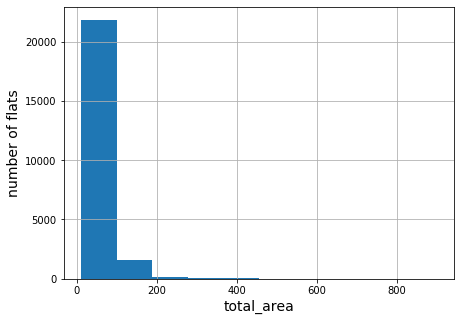

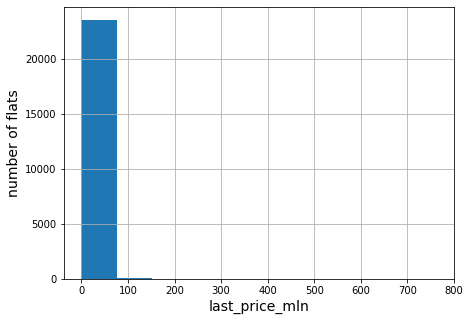

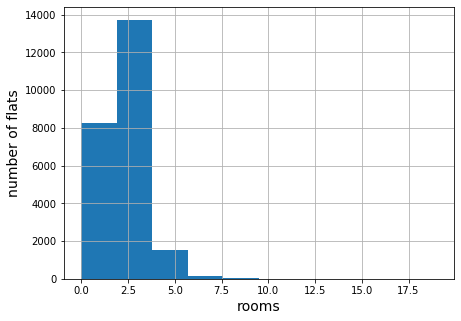

In [87]:
# Draw the histogram and check the distribution of total_area, last price, number of rooms
# create a new column 'last_price_mln' for better visibility
data['last_price_mln'] = data['last_price'] / 1000000

parameters = ['total_area','last_price_mln','rooms']

for i in parameters:
    data[i].hist(figsize = (7,5))
    plt.xlabel(i, fontsize=14)
    plt.ylabel('number of flats', fontsize=14)
    plt.show();

##### On the histogram we see: the pick of total_area in range 5-100 m2. <br>The pick of last price in range 0-80 mln. <br> The range of number of rooms - 1-3 ones.
##### These histograms are not informative.Check these ranges of values more careful using type of plot - boxplot

In [88]:
#function for drawing boxplot
def boxplotF(columns,range_left,range_right):    
    data.boxplot(column=columns)
    plt.ylabel(columns)
    plt.ylim(range_left, range_right)
    print(data[columns].describe()) 

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


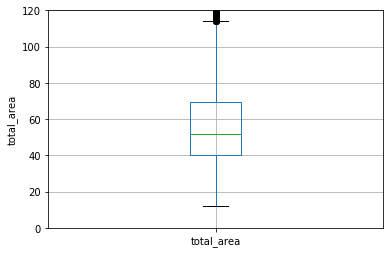

In [94]:
# draw boxplot for total area
A = boxplotF('total_area',0,120);

In [95]:
# calculate the border of whiskers
print('upper whisker border',(69-40)*1.5+69)
print('lower whisker border', 40-(69-40)*1.5)
# it means the lower border equal to 0

upper whisker border 112.5
lower whisker border -3.5


In [96]:
# calculate the number of flats out of the range of 'normal flats'
print('number of big flat: ',len(data.query('total_area > 112.5')))

number of big flat:  1310


##### We see the normal area for analisys from 12 to 112,5 m2. <br> The outlier area starts from 112,5 m2. Number of flats with outlier area is 1310 <br> But we can't discard this data, because it is a special segment 'BIG FLATS'. <br> We should research this segment separately of the rest flats.

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_mln, dtype: float64


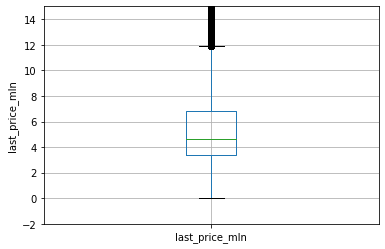

In [98]:
# draw boxplot for last_price_mln
boxplotF('last_price_mln',-2,15);

In [99]:
# calculate the border of whiskers
print('upper whisker border',(6.799 - 3.4)*1.5+6.799)
print('lower whisker border', 3.4-(6.799 - 3.4)*1.5)
# it means the lower border equal to 0

print('number of expensive flat:', len(data.query('last_price_mln > 11.8975')))



upper whisker border 11.8975
lower whisker border -1.6985000000000006
number of expensive flat: 2055


##### The normal price for analisys from 0 to 11.89 mln. <br> The outlier price starts from 11.89 mln. <br> Number of flats with outlier price are 2055. <br> But we can't discard this data, because it is a special segment 'EXPENSIVE FLATS'. We should explore this segment separately of the rest flats. 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


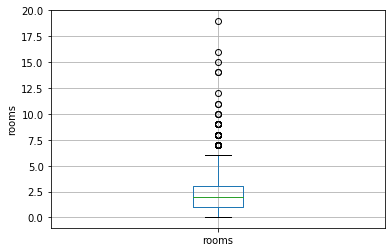

In [101]:
# draw boxplot for rooms
boxplotF('rooms',-1,20);

In [102]:
print('upper whisker border',(3 - 1)*1.5+3)
print('lower whisker border', 1-(3 - 1)*1.5)
# it means the lower border equal to 0

# count the number of extra-rooms flat
print('number of extra-rooms flat:', len(data.query('rooms > 6')))

upper whisker border 6.0
lower whisker border -2.0
number of extra-rooms flat: 90


In [103]:
#check the mean 'total_area' of extra-rooms flat
extra_rooms_data = data.query(' rooms > 6')
extra_rooms_data['total_area'].mean()

279.02555555555557

##### The number of rooms in a 'normal flat' in range 0-6 rooms. But the flat with number of rooms upper than 6 is also real (because the mean area is also big). We can select them in a unique segment - 'EXTRA-ROOMS FLATS' and explore separetely. 

<i> Explore the days exposition of flat.
We will analyze only flats for which the days_exposition is known <i>

In [105]:
# sorted the data without NaN value in column 'days_exposition'
sorted_DE_data = data[data['days_exposition'].isnull() == False]

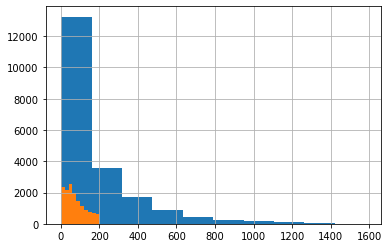

In [107]:
# draw the histogram
sorted_DE_data['days_exposition'].hist()
sorted_DE_data['days_exposition'].hist(range = (0,200));

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

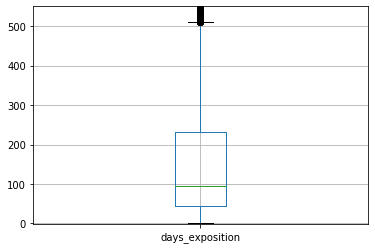

In [111]:
#draw the boxplot and discribe the values
sorted_DE_data.boxplot(column='days_exposition')
plt.ylim(-1, 550)
sorted_DE_data['days_exposition'].describe()

##### We see that STD is enormous (219.7) <br> Also we can see that median value more then twice less then mean value (95 days vs 180 days) <br> It means there are objects with very long selling time. <br> Check the count of such objects and the mean price for these obgects to determine the reason of long exposition time.

In [112]:
# sorted data to long selling flats
sorted_DE_data_long_time = sorted_DE_data.query('days_exposition > 500')
print('number of objects with a long selling time:',len(sorted_DE_data_long_time))
print('mean price:',sorted_DE_data_long_time['last_price_mln'].mean())
print('mean area:',sorted_DE_data_long_time['total_area'].mean())
print()
print(sorted_DE_data_long_time['locality_name'].value_counts().head())

number of objects with a long selling time: 1744
mean price: 8.445614451261463
mean area: 70.79566513761475

Санкт-Петербург    1217
деревня Кудрово      33
посёлок Мурино       32
Всеволожск           31
Пушкин               29
Name: locality_name, dtype: int64


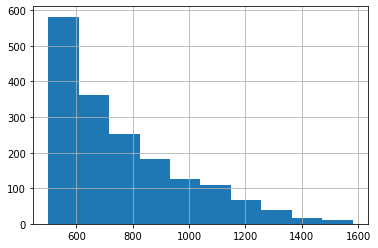

In [114]:
sorted_DE_data_long_time['days_exposition'].hist();

##### 1744 flats have atypical big selling time. the reason might be due to high price, whick higher than Q3 in boxplot. <br> To analyze the real mean selling time we should discarb this data.

In [115]:
# sorted data to short selling flats 
sorted_DE_data_short_time = sorted_DE_data.query('days_exposition < 45')
print('number of objects with a short selling time',len(sorted_DE_data_short_time))
print('mean price',sorted_DE_data_short_time['last_price_mln'].mean())
print('mean area',sorted_DE_data_short_time['total_area'].mean())
print()
print(sorted_DE_data_short_time['locality_name'].value_counts().head())

number of objects with a short selling time 5087
mean price 5.594183856693547
mean area 53.64348142323567

Санкт-Петербург    3555
посёлок Мурино      159
посёлок Шушары       97
Колпино              84
деревня Кудрово      79
Name: locality_name, dtype: int64


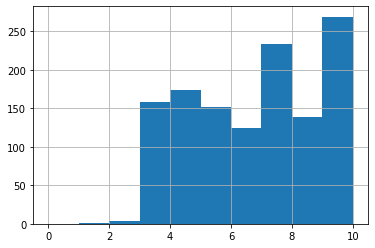

In [117]:
sorted_DE_data_short_time['days_exposition'].hist(range = (0,10));

##### Were not found any abnormal data in short-selling flats. The mean price and mean area corresponds to average values. <br> We can consider the short days_eposition are 1-3 days. Because the number of these flats are minor. 

<i> We should exclude long and short selling flats and analize mean and medium values one more time <i>

In [118]:
#exclude long and short selling flats
sorted_DE_data_final = sorted_DE_data.query('3 < days_exposition < 500')
sorted_DE_data_final['days_exposition'].describe()

count    18717.000000
mean       126.915798
std        119.020671
min          3.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

#### The mean value of flat selling is 126 days. <br> The median value in 84 days. <br> We can consider the sales faster than 3 days are a short sales. <br> The sales longer then 500 days are a long sale.

<i> What factors most affect the value of the apartment? Examine whether the price depends on square meter, number of rooms, distance from the center. Examine the dependence of the price on what floor the apartment is located: first, last or other. Also study the dependence on the date of placement: day of the week, month and year <i>

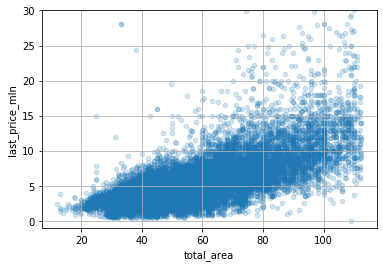

In [120]:
#explore the price dependence on flat area, cleaned from 'BIG FLAT' flat (total_area > 112.5)
data_normal_area_flat = data.query('total_area <= 112.5')
data_normal_area_flat.sort_values('last_price_mln').plot(x='total_area', y='last_price_mln'
                                 ,kind='scatter', alpha=0.2, grid = True)
plt.ylim(-1, 30);

###### We can see on the graph the general trend. The bigger flat have bigger price.  <br>But the range is quite  wide. For example the range for 60m2 flats about 1-12 mln. rub. <br> And the price 5 mln ruble is applicable for about 30-90 m2

In [121]:
data_40m2 = data.query('39 <total_area <41').sort_values(by='last_price')
data_40m2[['locality_name','last_price']]

,locality_name,last_price
16274,деревня Старополье,440000
6859,деревня Старополье,490000
19555,Сланцы,650000
164,поселок городского типа Ефимовский,800000
10219,Сланцы,900000
...,...,...
8232,Санкт-Петербург,7750000
3686,Санкт-Петербург,7790000
7166,Санкт-Петербург,8000000
7460,Санкт-Петербург,8000000


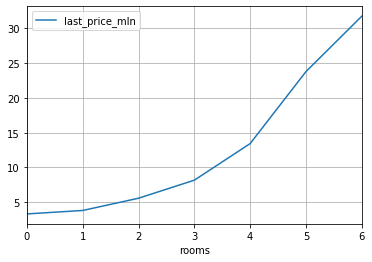

In [123]:
#explore the price dependence on number of rooms, cleaned from extra-rooms flat (>6), 
#because the count of big flats is not enough for accurate analysis
data_normal_room_flat = data.query('rooms <=6 ')
data_normal_room_flat_pivot = data_normal_room_flat.pivot_table(index = 'rooms', values = 'last_price_mln', 
                 aggfunc = 'mean').sort_values(by='last_price_mln',ascending = False)
data_normal_room_flat_pivot.plot(grid = True);

##### We see the direct correlation on the histogram. The more the number of rooms, the more the price of flat.

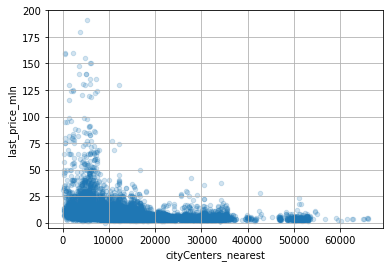

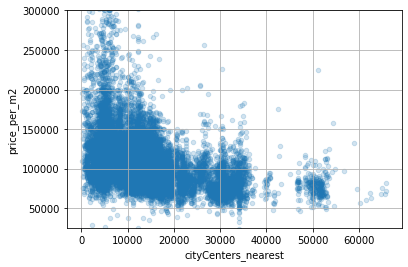

In [125]:
# explore the price depends on city center nearest 

# depending on the flat price
data.sort_values('last_price_mln').plot(x='cityCenters_nearest', y='last_price_mln'
                                 ,kind='scatter', alpha=0.2, grid = True)
plt.ylim(-5, 200)

#dependin on the m2 price
data.sort_values('price_per_m2').plot(x='cityCenters_nearest', y='price_per_m2'
                                 ,kind='scatter', alpha=0.2, grid = True)
plt.ylim(25000, 300000);

#####  There is the similar  dependence in the both charts. The clother to center, the higher price.

In [126]:
# check how the floor affect to price on flat.  Will be dealing with all,
# exclude St.Petersburg locations and at St. Petersburg only, separately based on price per m2

# exclude St. Petersburg
print('dependence on floor in provices')
data_floor_sorted_province = data[data['locality_name'] != 'Санкт-Петербург']
print(data_floor_sorted_province.pivot_table(index = 'floor_desc', values = 'price_per_m2',
                              aggfunc = 'mean').sort_values(by = 'price_per_m2'))

# St.Petersburg only
print('----------------------------------')
print('dependence on floor in St. Petersburg')
data_floor_sorted_Spb = data[data['locality_name'] == 'Санкт-Петербург']
print(data_floor_sorted_Spb.pivot_table(index = 'floor_desc', values = 'price_per_m2',
                              aggfunc = 'mean').sort_values(by = 'price_per_m2'))


dependence on floor in provices
            price_per_m2
floor_desc              
the first   59517.408537
the last    62098.598046
other       73100.630401
----------------------------------
dependence on floor in St. Petersburg
             price_per_m2
floor_desc               
the first   100415.455000
other       116424.531078
the last    116856.437693


###### Flats, located in the first floor, the most cheaper in both data set. <br> Flats, located in the last floor ~15% cheaper than the middle floors and 4% more expensive then the flats on the first floor in 'province' <br> In St. Petersburg there is another situation - the cost for flats on the first and middle floors are similar. <br> I suppose, the reason, there are more new building in St. Petersburg compared to province. In a new building the negative affect from the last floor is minimise

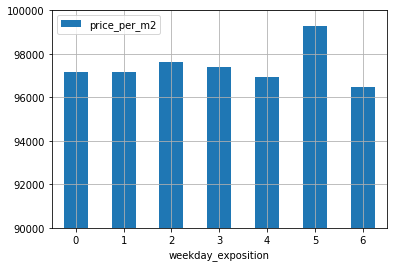

In [128]:
# check dependence on week day of exposition
# take data sorted from short days exposition(<3 days) and long day exposition (>500)
WeekDayPrice =  sorted_DE_data_final.pivot_table(index = 'weekday_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
WeekDayPrice.plot(kind='bar',grid = True, rot = 0)
plt.ylim(90000, 100000);
 

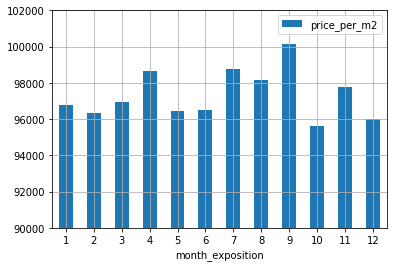

In [130]:
# check dependence on month of exposition
MonthPrice =  sorted_DE_data_final.pivot_table(index = 'month_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
MonthPrice.plot(kind='bar',grid = True, rot = 0)
plt.ylim(90000, 102000);

,price_per_m2
year_exposition,
2015,97643.589165
2016,97175.521004
2017,96739.756275
2018,96857.655414
2019,105671.185357


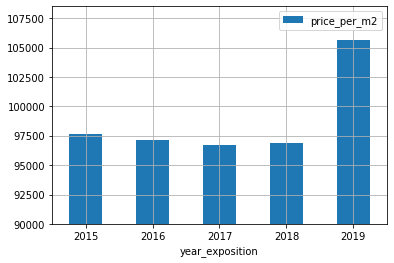

In [131]:
# check dependence on year of exposition
YearPrice =  sorted_DE_data_final.pivot_table(index = 'year_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
YearPrice.plot(kind='bar',grid = True, rot = 0)
plt.ylim(90000, 108500)
YearPrice

######  Flats, exposed on Saturday the more expensive.<br> Flats, exposed on Sunday the most cheaper. The most expensive month is Septeber, the most cheapest is October. 
###### The price was increased by 9% in 2019.

<i> Select 10 locations with the most ads. Calculate the average price per square meter in these locations. Highlight the location with the highest and lowest cost. This data can be found by name in the column 'locality_name' <i>

In [132]:
# find the top of most popular location for flat selling
#top_locations = data['locality_name'].value_counts().head(10)
top_locations = data.pivot_table(index = 'locality_name', values = 'rooms', 
                 aggfunc = 'count').sort_values(by='rooms', ascending = False).head(10)
top_locations.columns = ['count']
top_locations

,count
locality_name,
Санкт-Петербург,15721
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [133]:
# calculate the mean flat price per m2
avr_price_loc = data.pivot_table(index = 'locality_name', values = 'price_per_m2', 
                                 aggfunc = 'mean')
avr_price_loc.sort_values(by = 'price_per_m2', ascending = False)

,price_per_m2
locality_name,
посёлок Лисий Нос,121615.500000
Зеленогорск,115122.500000
Санкт-Петербург,114848.565231
посёлок Репино,104238.500000
Пушкин,103125.373984
...,...
поселок Совхозный,12628.500000
деревня Выскатка,12335.000000
деревня Вахнова Кара,11688.000000


In [134]:
#merge two tables
top_locations_data = top_locations.join(avr_price_loc)
top_locations_data.sort_values(by = 'price_per_m2', ascending = False)

,count,price_per_m2
locality_name,,
Санкт-Петербург,15721,114848.565231
Пушкин,369,103125.373984
деревня Кудрово,299,92473.086957
посёлок Парголово,327,90175.489297
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Колпино,338,75424.150888
Гатчина,307,68745.693811
Всеволожск,398,68654.007538


In [135]:
#Calculate the share total_10 of total
print('top_10 share of total:','top_10:', top_locations['count'].sum()/len(data))

top_10 share of total: top_10: 0.8016067653276956


###### Ten locations account for 80 percent of sales. <br> the most expensive city from Top_10 is St.Petersburg, the mean price per m2  is  114 848 rubles. <br>  The cheapest one is Vyborg with price 58 141mln rubles. <br> But if we look at the whole list of locations we'll see, that St.Petersburg on the 3th place on the list, and the most expensive flat costs 121 615 rubles per m2. <br> The cheapest cost is 11 206 rubles per m2.

<i>Research the offers of apartments: for each apartment there is information about the distance to the center. Highlight apartments in St. Petersburg ('locality_name'). Your task is to find out which area is in the center. Create a column with the distance to the center in kilometers: round to integer values. After that, calculate the average price for each kilometer. Build a chart: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone<i>

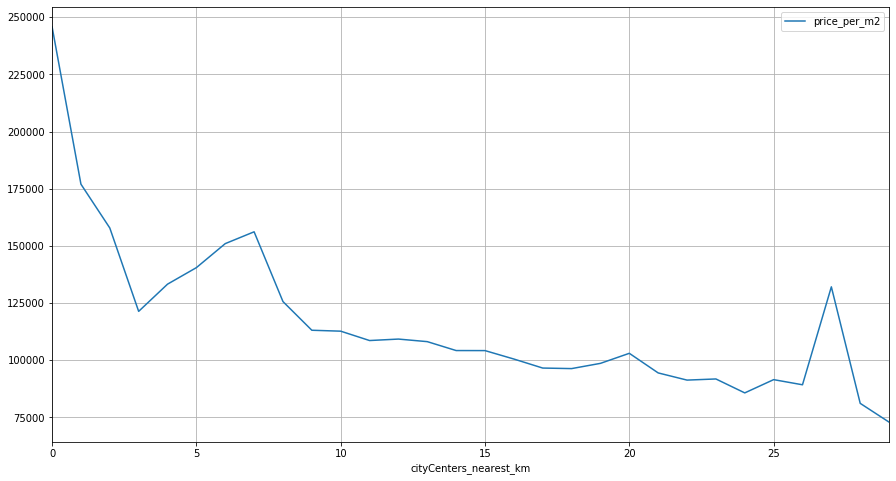

In [137]:
# add column with  distance to city center by km
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)

# sort the data by St.Petersburg city 
data_Spb = data[data['locality_name'] == 'Санкт-Петербург']
data_Spb_pivot_table = data_Spb.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_m2',
                                           aggfunc = 'mean').sort_values(by = 'cityCenters_nearest_km')
data_Spb_pivot_table.plot(grid = True, rot = 0, figsize=(15,8));

##### We can see on the chart, direction changes at 3 km. We can assume, this is the border of center.

<i> Highlight the segment of apartments in the center. Analyze this territory and explore the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the advertisement). To do conclusions. Do they differ from general findings throughout the city? <i>

In [139]:
# sort data_Spb by city center (<=3 km)
data_Spb_center = data_Spb.query('cityCenters_nearest_km <= 3')
data_Spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_desc,living/total_area,kitchen/total_area,last_price_mln,cityCenters_nearest_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265.0,66872,5,10,2015,the first,0.478395,0.201646,6.5,2.0
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104.0,106666,1,9,2017,other,0.744444,0.088889,9.6,3.0
138,8,4800000,40.0,2017-11-18,2,2.65,3,29.0,2,False,...,80.0,120000,5,11,2017,other,0.725000,0.150000,4.8,3.0
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,38.0,102500,1,11,2018,other,0.552500,0.152500,8.2,3.0
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.0,3,False,...,62.0,302839,4,7,2017,the last,0.577287,0.035016,96.0,2.0


In [140]:
# calculate the mean total_area 
print('mean of total area_Spb center:',data_Spb_center['total_area'].mean())
print('mean of total area all:',data['total_area'].mean())

mean of total area_Spb center: 98.63244596131965
mean of total area all: 60.329069344608705


##### In Spb city center the total area of flats 61% bigger than the  total data set.

In [141]:
# calculate the mean number of rooms
print('mean of rooms Spb center:',data_Spb_center['rooms'].mean())
print('mean of rooms all:',data['rooms'].mean())

mean of rooms Spb center: 3.110352673492605
mean of rooms all: 2.070105708245243


##### In Spb city center the number of rooms is more per one room than the total data set.

In [142]:
# calculate the mean ceiling_height 
print('mean of ceiling height Spb center:',data_Spb_center['ceiling_height'].mean())
print('mean of ceiling height all:', data['ceiling_height'].mean())

mean of ceiling height Spb center: 3.030841865756557
mean of ceiling height all: 2.6949978858354595


##### In Spb city center the ceiling height 30 centimeters more  than the total data set.

price mean Spb center 8.35
price mean all 4.5


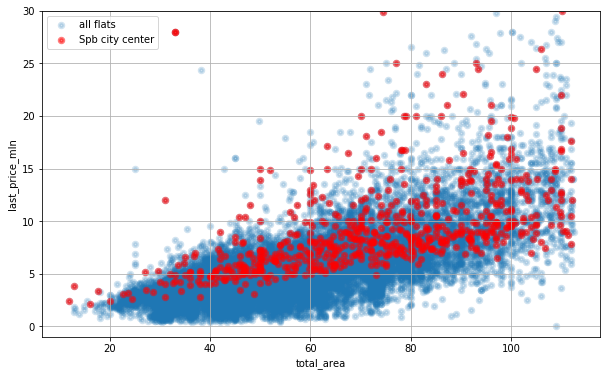

In [152]:
#explore the price dependence on flat area, cleaned from 'BIG FLAT' flat (total_area > 112.5)
data_normal_area_flat = data.query('total_area <= 112.5').sort_values('last_price_mln')
data_Spb_center_area = data_Spb_center.query('total_area <= 112.5').sort_values('last_price_mln')

ax = data_normal_area_flat.plot(x='total_area', y='last_price_mln'
                                ,kind='scatter', alpha=0.2, grid = True, figsize=(10,6),
                               linewidth=3,label='all flats')
data_Spb_center_area.plot(ax=ax, x='total_area', y='last_price_mln'
                                ,kind='scatter', alpha=0.5, grid = True,color = 'red',
                         linewidth=3,label='Spb city center' )
plt.ylim(-1, 30)
print('price mean Spb center',data_Spb_center_area['last_price_mln'].median())
print('price mean all',data_normal_area_flat['last_price_mln'].median() )

#####  the trend of the price dependence on flat area are similar for both data set. The bigger flats have bigger cost. <br> But the mean price of flats in Spb. center approximately twice higher than mean price of the total data set.

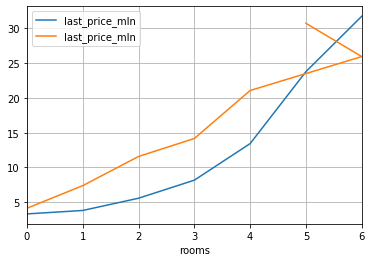

In [147]:
# explore the price depends on number of rooms
data_normal_room_flat = data.query('rooms <=6 ')
data_normal_room_flat_pivot = data_normal_room_flat.pivot_table(index = 'rooms', values = 'last_price_mln', 
                 aggfunc = 'mean').sort_values(by='last_price_mln',ascending = False)

data_Spb_center_normal_room_flat = data_Spb_center.query('rooms <=6 ')
data_Spb_center_normal_room_flat_pivot = data_Spb_center_normal_room_flat.pivot_table(index = 'rooms', values = 'last_price_mln', 
                 aggfunc = 'mean').sort_values(by='last_price_mln',ascending = False)

ax = data_normal_room_flat_pivot.plot(kind = 'line', label ='all flats')
data_Spb_center_normal_room_flat_pivot.plot(ax=ax,kind = 'line', grid=True, label ='city center Spb');

#####  the trend of the price dependence on number of rooms are similar for both data set. The flats with the bigger number of rooms have bigger cost. <br> The trend of the price dependence on number of rooms are similar for both data set. The flats with the bigger number of rooms have bigger cost. <br> But flats in Spb center cost higher than the flats in everywhere, except 5 rooms flats which cost similar for both data set.

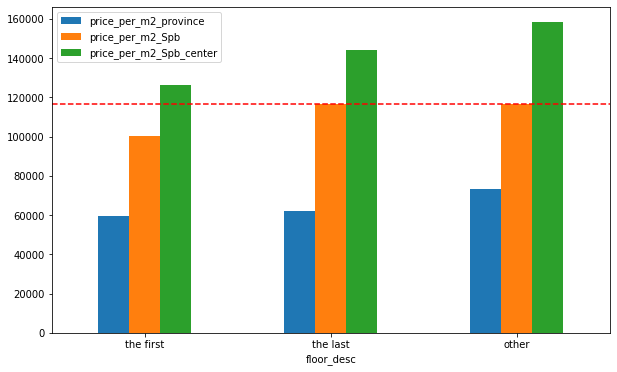

In [153]:
# check how the floor affect to price on flat.  Will be dealing with all,
# exclude St.Petersburg locations and at St. Petersburg only, separately based on price per m2

# exclude St. Petersburg
data_floor_sorted_province = data[data['locality_name'] != 'Санкт-Петербург']
data_floor_sorted_province_PT = data_floor_sorted_province.pivot_table(index = 'floor_desc', values = 'price_per_m2',
                              aggfunc = 'mean').sort_values(by = 'price_per_m2')

# St.Petersburg only
#print('----------------------------------')
#print('dependence on floor in St. Petersburg')
data_floor_sorted_Spb = data[data['locality_name'] == 'Санкт-Петербург']
data_floor_sorted_Spb_PT = data_floor_sorted_Spb.pivot_table(index = 'floor_desc', values = 'price_per_m2',
                              aggfunc = 'mean').sort_values(by = 'price_per_m2')

#St.Petersburg city center
data_Spb_center_PT = data_Spb_center.pivot_table(index = 'floor_desc', values = 'price_per_m2',
                              aggfunc = 'mean').sort_values(by = 'price_per_m2')

#merge three pivot table
dependence_on_floor_PT = data_floor_sorted_province_PT.merge(data_floor_sorted_Spb_PT, how = 'outer', on = 'floor_desc')
dependence_on_floor_PT = dependence_on_floor_PT.merge(data_Spb_center_PT, how = 'outer', on = 'floor_desc')
dependence_on_floor_PT.columns = ['price_per_m2_province', 'price_per_m2_Spb', 'price_per_m2_Spb_center']
ax = dependence_on_floor_PT.plot(y=['price_per_m2_province', 'price_per_m2_Spb', 'price_per_m2_Spb_center'], 
                            kind="bar", rot = 0,figsize=(10,6) )
ax.axhline(y=116424.531078, color = 'red', linestyle = '--');


##### In the Spb city center the most cheapest flats located in the first floor (the same as the rest data sets) <br> The last floor cheaper than the others and more expensive than the first. This behavior is similar to 'province' data set and opposite to whole St. Petersburg.

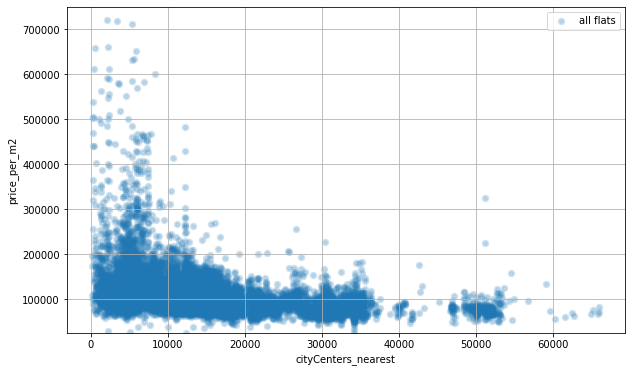

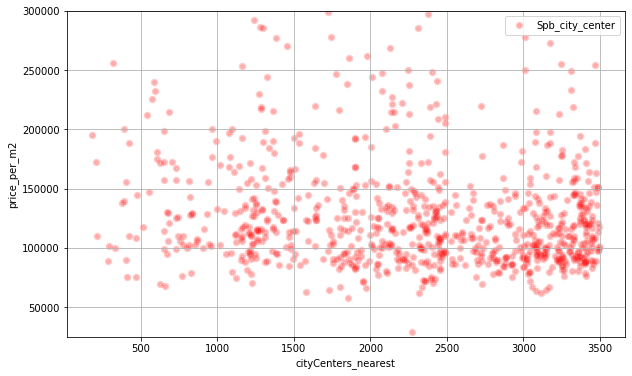

In [154]:
# explore the price depends on city center nearest 

data.sort_values('price_per_m2').plot(x='cityCenters_nearest', y='price_per_m2',
                                kind='scatter', alpha=0.2, grid = True, figsize=(10,6),
                               linewidth=3,label='all flats')
plt.ylim(25000, 750000)
data_Spb_center.plot(x='cityCenters_nearest', y='price_per_m2',
                                kind='scatter', alpha=0.2, grid = True, figsize=(10,6),
                               linewidth=3,label='Spb_city_center', color = 'red')

plt.ylim(25000, 300000);

#####  There is no difference in price within the historical center.

(90000, 165000)

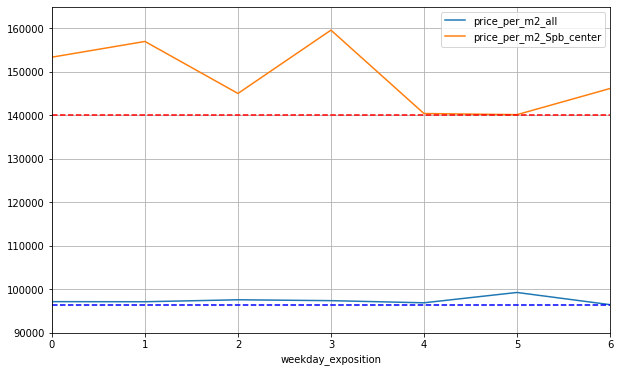

In [155]:
#WEEKDAY
# check dependence on week day of exposition
# take data sorted from short days exposition(<3 days) and long day exposition (>500)
WeekDayPrice =  sorted_DE_data_final.pivot_table(index = 'weekday_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
WeekDayPriceSpbCenter =  data_Spb_center.pivot_table(index = 'weekday_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')


WeekDayPriceSpbCenter = WeekDayPrice.merge(WeekDayPriceSpbCenter, how = 'outer', on = 'weekday_exposition')
WeekDayPriceSpbCenter.columns = ['price_per_m2_all', 'price_per_m2_Spb_center']

ax = WeekDayPriceSpbCenter.plot(kind='line',grid = True, rot = 0, figsize = (10,6))
ax.axhline(y=96496.935055, color = 'blue', linestyle = '--')
ax.axhline(y=140181.228070, color = 'red', linestyle = '--')

plt.ylim(90000, 165000)

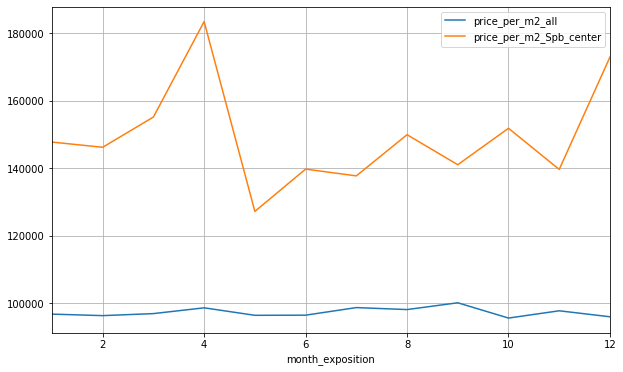

In [158]:
#MONTH
# check dependence on month of exposition
MonthPrice =  sorted_DE_data_final.pivot_table(index = 'month_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
MonthPriceCityCenter = data_Spb_center.pivot_table(index = 'month_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')

MonthPriceCityCenter = MonthPrice.merge(MonthPriceCityCenter, how = 'outer', on = 'month_exposition')
MonthPriceCityCenter.columns = ['price_per_m2_all', 'price_per_m2_Spb_center']

ax = MonthPriceCityCenter.plot(kind='line',grid = True, rot = 0, figsize = (10,6));

##### The most expensive month for Spb city center is April and the cheapest one is May compare to all data set where the most expensive month is September and the cheapest one is May.

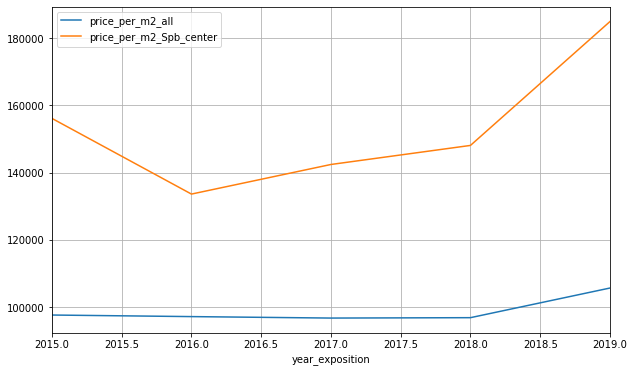

In [162]:
# YEAR
# check dependence on year of exposition
YearPrice =  sorted_DE_data_final.pivot_table(index = 'year_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')
YearPriceCityCenter = data_Spb_center.pivot_table(index = 'year_exposition', values = 'price_per_m2',
                                aggfunc = 'mean')

YearPriceCityCenter = YearPrice.merge(YearPriceCityCenter, how = 'outer', on = 'year_exposition')
YearPriceCityCenter.columns = ['price_per_m2_all', 'price_per_m2_Spb_center']

YearPriceCityCenter = YearPriceCityCenter[YearPriceCityCenter['price_per_m2_all'].isnull() == False]

ax = YearPriceCityCenter.plot(kind='line',grid = True, rot = 0, figsize = (10,6))

##### The price of apartments in the center of St. Petersburg began to increase in 2016 ( as opposed all apartments, the price of which began to increase in 2019)

### Шаг 5. Общий вывод

The data from the Real estate service for 2014 - 2019 were researched.
The data were considered in two sections: St. Petersburg + Leningrad Region and the central area of St. Petersburg, limited by a 3 km distance from the city center.

The following AVERAGE indicators of apartments were determined:

|research area   |area  |number of rooms |ceiling height
|----------------|--------|-------------|-----------|
|St.Petersburg |98.6 m2 |3.11         |  3.03     |
|all apartmnts      |60.3 m2 |2.07          |  2.69     |  

The average object sale time is 127 days, the median is 84 days.
Selling an apartment up to 3 days can be considered as a very fast, over 500 days - unusually long.

As a result of the analysis, it was found that, in general, the larger the apartment (including the number of rooms), and the closer to the center, than the higher its price.
However, the run-up in the data is very large, for example, the range of cost of the apartment 40m2  from 440 thousand rubles  to 9.5 million rubles.
As for the distance from the center: the closer the apartment is to the center,  the more expensive the price.

Interesting facts was found: as expected, the apartments on the 1st floor are the cheapest, on the top floor, on the second place, on the middle floors - the most expensive.
However, if we consider only apartments in St. Petersburg, we can see that the cost of apartments on the top and middle floors is the same.
Most likely, this is due to the fact that there are many new buildings in St. Petersburg, in which the negative effects of finding an apartment on the top floor are leveled, and there are even bonuses (lack of neighbors from above, beautiful view)

TOP 10 cities with the largest number of ads(which is 80% of all ads)
Three leaders:
<ol>
<li> Saint Petersburg </li>
<li> Marina Village </li>
<li> Shushary village </li>
</ol>
The most expensive city is St. Petersburg. Price per square meter - 114 8484.5 rubles
The cheapest is Vyborg. Price per square meter - 58 141.4 rubles